# **Setup**
Book: The Great Gatsby by F. Scott Fitzgerald</br>
Source: https://www.gutenberg.org/cache/epub/64317/pg64317.txt

In [18]:
from collections import Counter
import pandas as pd
import numpy as np
import nltk
from nltk import sent_tokenize, word_tokenize, FreqDist
from nltk.corpus import stopwords
stopwords_en = stopwords.words('english');
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer();
from string import punctuation
import re
from wordcloud import WordCloud
from gensim import corpora
import gensim
Lda = gensim.models.ldamodel.LdaModel
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import mglearn
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

filePath = "data/LongStory.txt";

# **Content Analysis**
Reference: https://www.geeksforgeeks.org/text-analysis-in-python-3/

## Word Frequency in Text

In [2]:
def count_words(text):
    skips = [".",", ",":",";"];
    for ch in skips:
        text = text.replace(ch, "");
    word_counts = Counter(text.split(" "));
    return word_counts;

# text = "This is my test text. We're keeping this text short to keep things manageable."
# text = text.lower()
# count_words(text)

In [3]:
def read_book(title_path):
    with open(title_path, "r", encoding="utf8") as current_file:
        text = current_file.read();
        text = text.replace("\n","").replace("\r","");
    return text;

# read_book("ShortStory.txt")

In [4]:
def word_stats(word_counts):
    num_unique = len(word_counts);
    counts = word_counts.values();
    return (num_unique, counts);

text = read_book(filePath);
word_counts = count_words(text);
(num_unique, counts) = word_stats(word_counts);
print(num_unique, sum(counts));

11627 41600


## Text Extraction & Pre-Processing
References:</br>
https://www.youtube.com/watch?v=7WfoYl-EPtI&list=LL&index=7</br>
https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0</br>
https://www.geeksforgeeks.org/python-lemmatization-with-nltk/?ref=lbp</br>
https://datagy.io/python-remove-punctuation-from-string/</br>
https://stackoverflow.com/questions/354038/how-do-i-check-if-a-string-is-a-number-float</br>

In [5]:
def proccess_text_for_NLP(text):
    single_tokenized_lowered = list(map(str.lower, word_tokenize(text)));
    stopwords_en = set(stopwords.words('english'));
    stopwords_en_withpunct = stopwords_en.union(set(punctuation));
    single_tokenized_lowered_nopunct = [word for word in single_tokenized_lowered if word not in stopwords_en_withpunct];
    # for word in single_tokenized_lowered_nopunct:
    #     word = re.sub("[,\.!?'`-]","", word);
    #     word = lemmatizer.lemmatize(word, pos="a");
    # textNLP = ','.join(single_tokenized_lowered_nopunct);
    textNLP_list = [];
    for word in single_tokenized_lowered_nopunct:
        if (word.isdigit() == False) & (word != "``") & (word != "''") & (word != ""):
            word = re.sub("[,\.!?'`-]","", word);
            word = re.sub(r'[^\w\s]','', word);
            word = lemmatizer.lemmatize(word, pos="a");
            # if word != "s":
            if word not in ["s","","nt","said"]:
                textNLP_list.append(word);
    textNLP = ','.join(textNLP_list);
    return textNLP;

<>:13: DeprecationWarning: invalid escape sequence '\.'
<>:13: DeprecationWarning: invalid escape sequence '\.'
C:\Users\kunal\AppData\Local\Temp/ipykernel_14168/204184403.py:13: DeprecationWarning: invalid escape sequence '\.'
  word = re.sub("[,\.!?'`-]","", word);


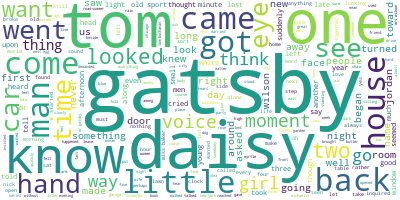

In [6]:
textNLP = proccess_text_for_NLP(text)

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

wordcloud.generate(textNLP)

wordcloud.to_image()

## Topic Modelling
References:</br>
https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0</br>
https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/</br>
https://stackoverflow.com/questions/33229360/gensim-typeerror-doc2bow-expects-an-array-of-unicode-tokens-on-input-not-a-si</br>
https://towardsdatascience.com/nlp-for-topic-modeling-summarization-of-legal-documents-8c89393b1534</br>
https://github.com/chibueze-oguejiofor/Machine-Learning-In-Law/blob/master/project.ipynb</br>

In [7]:
num_topics = 5;
num_words= 10;

### *Attempt 1*

In [8]:
dictionary = corpora.Dictionary([textNLP.split(",")]);
doc_term_matrix = [dictionary.doc2bow(doc) for doc in [textNLP.split(",")]];

In [9]:
ldamodel = Lda(corpus=doc_term_matrix, num_topics=num_topics, id2word = dictionary);

ldamodel.print_topics(num_topics=num_topics, num_words=num_words)

[(0,
  '0.007*"gatsby" + 0.006*"tom" + 0.005*"daisy" + 0.004*"one" + 0.003*"little" + 0.003*"man" + 0.003*"like" + 0.003*"came" + 0.003*"get" + 0.003*"looked"'),
 (1,
  '0.006*"gatsby" + 0.005*"tom" + 0.004*"daisy" + 0.004*"one" + 0.004*"man" + 0.004*"back" + 0.003*"came" + 0.003*"like" + 0.003*"new" + 0.003*"know"'),
 (2,
  '0.008*"gatsby" + 0.005*"tom" + 0.005*"daisy" + 0.004*"like" + 0.004*"one" + 0.003*"house" + 0.003*"man" + 0.003*"car" + 0.003*"came" + 0.003*"went"'),
 (3,
  '0.008*"gatsby" + 0.007*"daisy" + 0.006*"tom" + 0.004*"one" + 0.004*"man" + 0.004*"like" + 0.004*"back" + 0.003*"went" + 0.003*"little" + 0.003*"came"'),
 (4,
  '0.007*"gatsby" + 0.006*"tom" + 0.005*"one" + 0.004*"daisy" + 0.004*"came" + 0.004*"back" + 0.004*"like" + 0.003*"little" + 0.003*"eyes" + 0.003*"old"')]

### *Attempt 2*

In [10]:
vect = CountVectorizer(ngram_range=(1,1), stop_words='english');
dtm=vect.fit_transform(textNLP.split(","))
pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names_out())

,158th,1919,1922,300,33rd,430500,500,500600,5th,600,...,youstay,youth,youto,youtogether,youtwo,youwhat,youwhy,youwon,youwould,yukon
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23168,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
lda = LatentDirichletAllocation(n_components=5);
lda.fit_transform(dtm);

In [12]:
sorting = np.argsort(lda.components_)[:,::-1];
features = np.array(vect.get_feature_names_out());

In [13]:
mglearn.tools.print_topics(topics=range(num_topics), feature_names=features, sorting=sorting, topics_per_chunk=num_topics, n_words=num_words)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
daisy         gatsby        came          tom           like          
wilson        man           little        come          house         
night         went          know          mr            long          
way           got           old           car           door          
turned        eyes          moment        away          voice         
hand          looked        new           look          people        
sport         time          going         face          good          
young         jordan        want          began         asked         
oh            think         knew          right         took          
white         saw           girl          room          head          




In [14]:
zit=pyLDAvis.sklearn.prepare(lda,dtm,vect)

c:\Users\kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\kunal\AppData\Local\Programs\Python\Python310\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [15]:
pyLDAvis.display(zit)